#**DATA SCIENCE & BUSINESS ANALYTICS INTERN @ THE SPARKS FOUNDATION**
####Author: Aishwarya Sawant 
####Task 1: Prediction using Supervised ML

###**Importing all required libraries** 

In [55]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

###**Reading data**

In [56]:
datapath = "http://bit.ly/w-data"
Data = pd.read_csv(datapath)
print("Data imported successfully")



Data imported successfully


In [57]:
Data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [58]:
Data.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


###**Describing the Data**


In [59]:
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


###**Visualizing the Data**

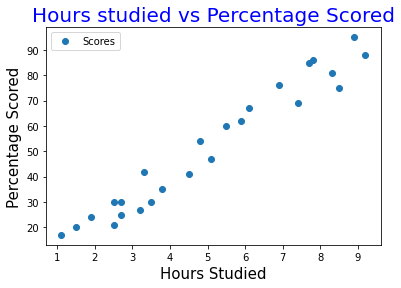

In [60]:
Data.plot(x='Hours', y='Scores', style='o')
plt.xlabel('Hours Studied',fontsize=15)
plt.ylabel('Percentage Scored',fontsize=15)
plt.title('Hours studied vs Percentage Scored', fontsize = 20, color = 'BLUE')
plt.show()


From the above plot, we deduce that there is a positive correlation between the number of hours studied and the percentage scored



###**Preparing the data**
Dividing the data into inputs as attributes and outputs as labels

In [61]:
X = Data.iloc[:, :-1].values  
y = Data.iloc[:, 1].values 

After dividing our attributes and labels, we split this data into training and test sets.

In [62]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

###**Training the Data**

In [63]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

print("Training complete.")

Training complete.


###**Plotting the regression line**

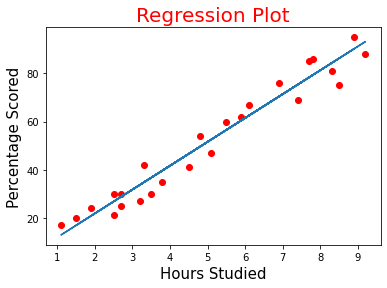

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [64]:
line = reg.coef_*X+reg.intercept_

plt.title('Regression Plot', fontsize = 20, color = 'red')
plt.scatter(X, y, color = 'red')
plt.plot(X, line);
plt.xlabel('Hours Studied',fontsize=15)
plt.ylabel('Percentage Scored',fontsize=15)
plt.show()
print(Data.corr())

###**Making Predictions** using the trained algorithm

In [65]:
predict_y = reg.predict(X_test)
predict = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [j for j in predict_y]})
predict

,Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


###**Comparing the Predicted Marks with the Actual Marks**

In [66]:
compare = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': predict_y})  
compare 

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


###**Visualizing the Comparison**

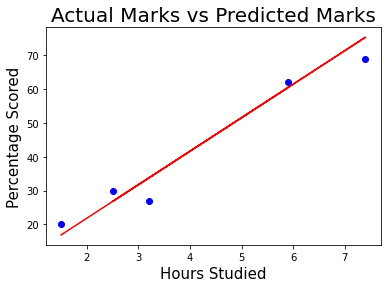

In [67]:
plt.scatter(x = X_test, y = y_test, color = 'blue')
plt.plot(X_test, predict_y, color = 'red')
plt.title('Actual Marks vs Predicted Marks', size=20)
plt.ylabel('Percentage Scored', size=15)
plt.xlabel('Hours Studied', size=15)
plt.show()

###**Evaluating the Accuracy of the Model**

In [68]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predict_y)) 

Mean Absolute Error: 4.183859899002982


As the Mean Absolute Error is small, the chances of error are very low.

###**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [69]:
hours = [9.25]
answer = reg.predict([hours])
print("Percentage Scored = {}".format(round(answer[0],3)))

Percentage Scored = 93.692


**According to the model, if a student studies for 9.25 hours a day he/she is likely to score 93.692 %**